In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('Train_Data.csv')
df

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [3]:
def preprocess_inputs(df):
    
    df = df.copy()
    sex_wrapper = {'male':0, 'female':1}
    df.sex = df.sex.replace(sex_wrapper)

    df.smoker.value_counts()
    smoker_wrapper = {'no':0, 'yes':1}
    df.smoker = df.smoker.replace(smoker_wrapper)

    df = pd.get_dummies(df, columns=['region'])
    
    return df

In [4]:
df = preprocess_inputs(df)

In [5]:
df.isna().sum()

age                 0
sex                 0
bmi                 0
smoker              0
children            0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [6]:
print(df)

            age  sex        bmi  smoker  children       charges  \
0     21.000000    0  25.745000       0         2   3279.868550   
1     36.976978    1  25.744165       1         3  21454.494239   
2     18.000000    0  30.030000       0         1   1720.353700   
3     37.000000    0  30.676891       0         3   6801.437542   
4     58.000000    0  32.010000       0         1  11946.625900   
...         ...  ...        ...     ...       ...           ...   
3625  48.820767    1  41.426984       0         4  10987.324964   
3626  38.661977    1  26.202557       0         2  11735.844352   
3627  56.000000    0  40.300000       0         0  10602.385000   
3628  48.061207    1  34.930624       0         1   8976.140452   
3629  37.598865    1  25.219233       0         3   7027.698968   

      region_northeast  region_northwest  region_southeast  region_southwest  
0                    1                 0                 0                 0  
1                    0               

In [2]:
# import dataset
from pycaret.datasets import get_data
df = pd.read_csv('Train_Data.csv')
df

# to see all the datasets in PyCaret
#all_datasets = get_data('index')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# let's inspect the attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
# Importing module and initializing setup
from pycaret.regression import *
reg1 = setup(data = df, target = 'charges', numeric_features=['children'])

,Description,Value
0,session_id,6526
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 9)"


In [7]:
# return best model
rf = create_model('rf')

# run this is you want to compare all the models 
#best = compare_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2154,1.837e+07,4286,0.8522,0.4405,0.345
1,2404,2.02e+07,4495,0.8502,0.3654,0.2635
2,1744,7.677e+06,2771,0.9359,0.2922,0.2349
3,2746,2.419e+07,4919,0.8315,0.4886,0.3548
4,2586,2.478e+07,4978,0.8316,0.4988,0.2989
5,2180,1.626e+07,4032,0.9042,0.489,0.4112
6,2509,2.014e+07,4488,0.8167,0.4754,0.2999
7,3196,3.082e+07,5552,0.7425,0.5655,0.3904
8,2492,2.538e+07,5038,0.8408,0.4303,0.242
9,2807,2.823e+07,5314,0.8348,0.4989,0.2773


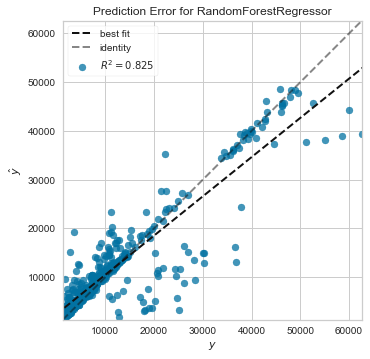

In [8]:
plot_model(rf, plot = 'error')

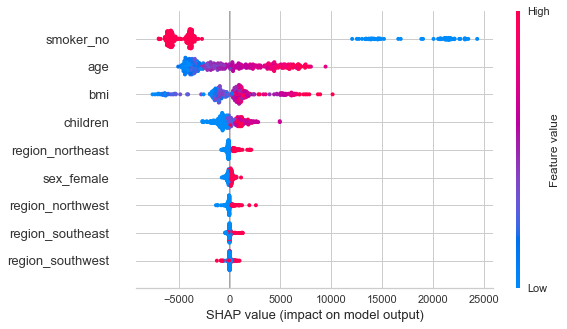

In [9]:
# interpreting model
interpret_model(rf)

In [10]:
# finalize a model - use all the data in training
final_rf = finalize_model(rf)

In [11]:
# generate predictions on unseen data

test_data = pd.DataFrame({'age': [35], 
                          'sex': ['female'], 
                          'bmi': [21], 
                          'children' : [0], 
                          'smoker': ['no'], 
                          'region': ['southeast']})

predictions = predict_model(final_rf, data = test_data)
predictions

,age,sex,bmi,children,smoker,region,Label
0,35,female,21,0,no,southeast,7178.252388


In [12]:
# save a model
save_model(final_rf, 'rf_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['children'],
                                       target='charges', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=None,
                                        max_features='auto', max_leaf_nodes=None,
                                        max_samples=None,
                             